In [1]:
# broad analysis with a focus on trends having to do with rating
# questions and answers format

In [239]:
import numpy as np 
import math 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize


In [240]:
df = pd.read_csv('IMDBMovieData.csv')
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [241]:
df.set_index('Rank', inplace = True)

In [242]:
def genreHorror(s):
    if s.find('Horror')>=0:
        return True

In [243]:
horror = df[df['Genre'].apply(genreHorror) == True]
horror

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
23,Hounds of Love,"Crime,Drama,Horror",A cold-blooded predatory couple while cruising...,Ben Young,"Emma Booth, Ashleigh Cummings, Stephen Curry,S...",2016,108,6.7,1115,NaN,72.0
28,Dead Awake,"Horror,Thriller",A young woman must save herself and her friend...,Phillip Guzman,"Jocelin Donahue, Jesse Bradford, Jesse Borrego...",2016,99,4.7,523,0.01,NaN
35,Resident Evil: The Final Chapter,"Action,Horror,Sci-Fi",Alice returns to where the nightmare began: Th...,Paul W.S. Anderson,"Milla Jovovich, Iain Glen, Ali Larter, Shawn R...",2016,107,5.6,46165,26.84,49.0
43,Don't Fuck in the Woods,Horror,A group of friends are going on a camping trip...,Shawn Burkett,"Brittany Blanton, Ayse Howard, Roman Jossart,N...",2016,73,2.7,496,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
974,Scream 4,"Horror,Mystery","Ten years have passed, and Sidney Prescott, wh...",Wes Craven,"Neve Campbell, Courteney Cox, David Arquette, ...",2011,111,6.2,108544,38.18,52.0
987,Final Destination 5,"Horror,Thriller",Survivors of a suspension-bridge collapse lear...,Steven Quale,"Nicholas D'Agosto, Emma Bell, Arlen Escarpeta,...",2011,92,5.9,88000,42.58,50.0
989,Martyrs,Horror,A young woman's quest for revenge against the ...,Pascal Laugier,"Morjana Alaoui, Mylène Jampanoï, Catherine Bég...",2008,99,7.1,63785,NaN,89.0


In [244]:
mostVotes = horror.sort_values(by = ['Votes'], ascending = False).head(8)
mostVotes

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
496,I Am Legend,"Drama,Horror,Sci-Fi",Years after a plague kills most of humanity an...,Francis Lawrence,"Will Smith, Alice Braga, Charlie Tahan, Salli ...",2007,101,7.2,565721,256.39,65.0
433,World War Z,"Action,Adventure,Horror",Former United Nations employee Gerry Lane trav...,Marc Forster,"Brad Pitt, Mireille Enos, Daniella Kertesz, Ja...",2013,116,7.0,494819,202.35,63.0
364,Zombieland,"Adventure,Comedy,Horror",A shy student trying to reach his family in Oh...,Ruben Fleischer,"Jesse Eisenberg, Emma Stone, Woody Harrelson,A...",2009,88,7.7,409403,75.59,73.0
255,The Conjuring,"Horror,Mystery,Thriller",Paranormal investigators Ed and Lorraine Warre...,James Wan,"Patrick Wilson, Vera Farmiga, Ron Livingston, ...",2013,112,7.5,330305,137.39,68.0
493,Cloverfield,"Action,Horror,Sci-Fi",A group of friends venture deep into the stree...,Matt Reeves,"Mike Vogel, Jessica Lucas, Lizzy Caplan, T.J. ...",2008,85,7.0,313803,80.03,64.0
651,Sweeney Todd: The Demon Barber of Fleet Street,"Drama,Horror,Musical","The infamous story of Benjamin Barker, a.k.a. ...",Tim Burton,"Johnny Depp, Helena Bonham Carter, Alan Rickma...",2007,116,7.4,296289,52.88,83.0
303,The Cabin in the Woods,Horror,"Five friends go for a break at a remote cabin,...",Drew Goddard,"Kristen Connolly, Chris Hemsworth, Anna Hutchi...",2012,95,7.0,295554,42.04,72.0
676,The Mist,Horror,A freak storm unleashes a species of bloodthir...,Frank Darabont,"Thomas Jane, Marcia Gay Harden, Laurie Holden,...",2007,126,7.2,233346,25.59,58.0


### What horror movies recieved the most votes? How many?

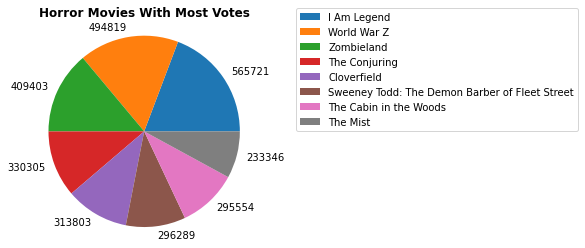

In [245]:
numberOfVotes = mostVotes['Votes']
movie = mostVotes['Title']


leg, texts = plt.pie(numberOfVotes, labels = numberOfVotes, radius = 1.1)
plt.legend(leg, movie, loc = (1.2,.5))

plt.title('Horror Movies With Most Votes', fontweight = 'bold')

plt.show()

In [246]:
highestRating = horror.sort_values(by = ['Rating'], ascending = False).head(5)
highestRating

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
155,Twin Peaks: The Missing Pieces,"Drama,Horror,Mystery",Twin Peaks before Twin Peaks (1990) and at the...,David Lynch,"Chris Isaak, Kiefer Sutherland, C.H. Evans, Sa...",2014,91,8.1,1973,NaN,NaN
364,Zombieland,"Adventure,Comedy,Horror",A shy student trying to reach his family in Oh...,Ruben Fleischer,"Jesse Eisenberg, Emma Stone, Woody Harrelson,A...",2009,88,7.7,409403,75.59,73.0
381,What We Do in the Shadows,"Comedy,Fantasy,Horror",A documentary team films the lives of a group ...,Jemaine Clement,"Jemaine Clement, Taika Waititi,Cori Gonzalez-M...",2014,86,7.6,84016,3.33,76.0
829,Grindhouse,"Action,Horror,Thriller",Quentin Tarantino and Robert Rodriguez's homag...,Robert Rodriguez,"Kurt Russell, Rose McGowan, Danny Trejo, Zoë Bell",2007,191,7.6,160350,25.03,NaN
291,Busanhaeng,"Action,Drama,Horror",While a zombie virus breaks out in South Korea...,Sang-ho Yeon,"Yoo Gong, Soo-an Kim, Yu-mi Jung, Dong-seok Ma",2016,118,7.5,58782,2.13,72.0


### What are the top 5 horror movie ratings?

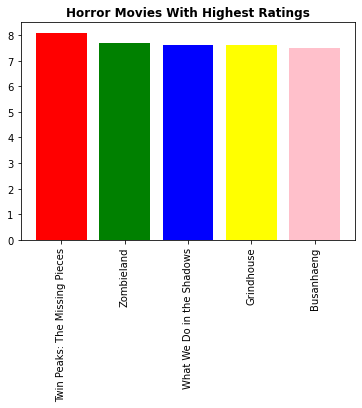

In [247]:
rate = highestRating['Rating']
movie = highestRating['Title']

plt.bar(movie, rate, color = ['red', 'green', 'blue', 'yellow', 'pink'])
plt.xticks(rotation = 90)

plt.title('Horror Movies With Highest Ratings', fontweight = 'bold')

plt.show()

In [248]:
horror.sort_values(by = ['Rank'], ascending = True).head(5)

,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,,,,,,,,,,,
3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
23,Hounds of Love,"Crime,Drama,Horror",A cold-blooded predatory couple while cruising...,Ben Young,"Emma Booth, Ashleigh Cummings, Stephen Curry,S...",2016,108,6.7,1115,NaN,72.0
28,Dead Awake,"Horror,Thriller",A young woman must save herself and her friend...,Phillip Guzman,"Jocelin Donahue, Jesse Bradford, Jesse Borrego...",2016,99,4.7,523,0.01,NaN
35,Resident Evil: The Final Chapter,"Action,Horror,Sci-Fi",Alice returns to where the nightmare began: Th...,Paul W.S. Anderson,"Milla Jovovich, Iain Glen, Ali Larter, Shawn R...",2016,107,5.6,46165,26.84,49.0
43,Don't Fuck in the Woods,Horror,A group of friends are going on a camping trip...,Shawn Burkett,"Brittany Blanton, Ayse Howard, Roman Jossart,N...",2016,73,2.7,496,NaN,NaN


### Rating vs Metascore Frequency


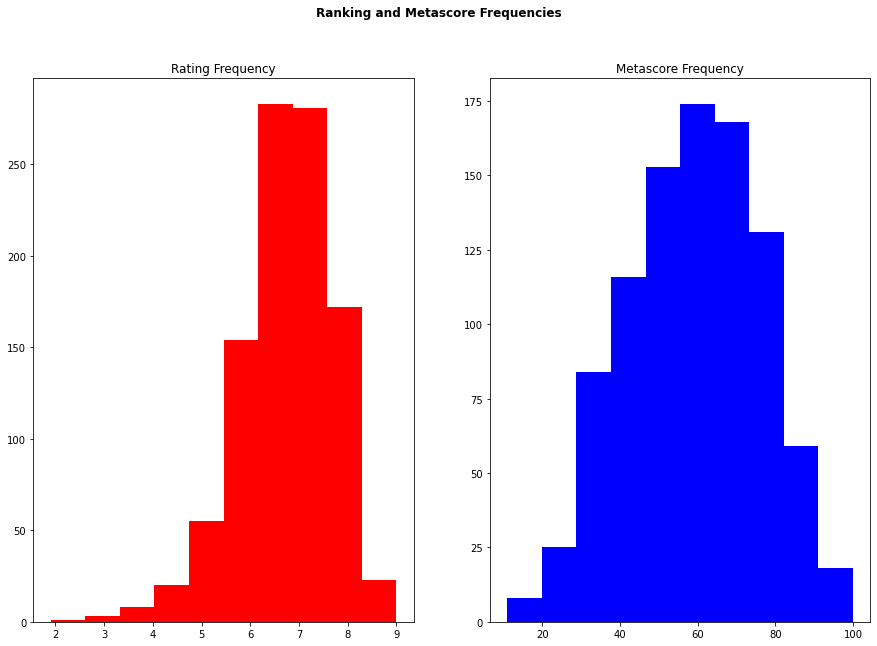

In [261]:

fig = plt.figure(figsize = (15,10))
axes1 = fig.add_subplot(1,2,1)
axes2 = fig.add_subplot(1,2,2)
axes1.hist(df['Rating'], color = 'red');
axes2.hist(df['Metascore'], color = 'blue');
axes1.set_title("Rating Frequency")
axes2.set_title("Metascore Frequency")




fig.suptitle("Ranking and Metascore Frequencies", fontweight = 'bold')


plt.show()

### Is there a true correlation between movie rating and votes recieved?

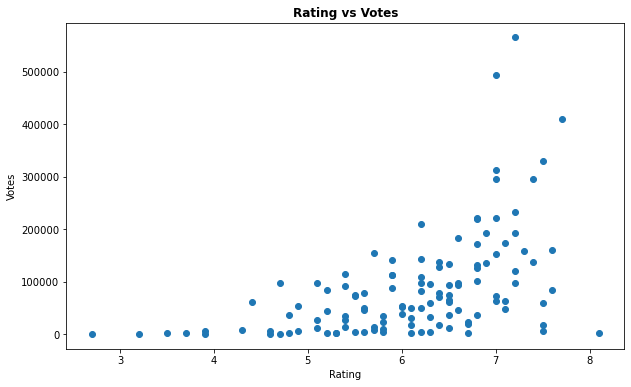

In [249]:
plt.figure(figsize = (10,6))
ratings = horror['Rating']
votes = horror['Votes']
movie = horror['Title']
plt.plot(ratings, votes, 'o')
plt.xlabel('Rating')
plt.ylabel('Votes')
plt.title('Rating vs Votes', fontweight = 'bold')

plt.show()



### What are the most common horror movie release years on the list?

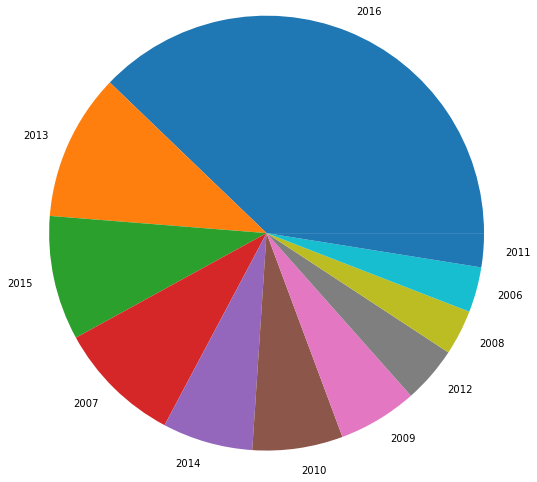

In [213]:
yearsAmnt = list(horror['Year'].value_counts())
years = horror['Year'].value_counts().keys()

plt.pie(yearsAmnt, labels = years, radius = 2.5)
plt.show()

### What are the most common movie Lengths?

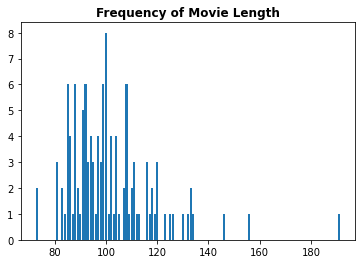

In [225]:
runtimeAmnt = list(horror['Runtime (Minutes)'].value_counts())
runtime = horror['Runtime (Minutes)'].value_counts().keys()

plt.bar(runtime, runtimeAmnt)
plt.title('Frequency of Movie Length', fontweight = 'bold')
plt.show()

### Is there any correlation between rating and runtime?

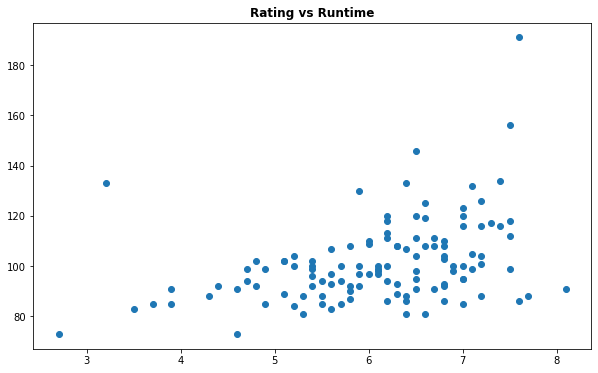

In [235]:
plt.figure(figsize = (10, 6))
plt.plot(horror['Rating'], horror['Runtime (Minutes)'], 'o')
plt.title('Rating vs Runtime', fontweight = 'bold')
plt.show()

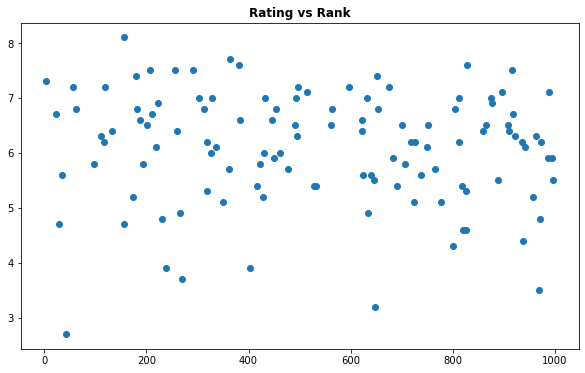

In [237]:
plt.figure(figsize = (10, 6))
plt.plot(horror['Rating'], 'o')
plt.title('Rating vs Rank', fontweight = 'bold')
plt.show()